# Price Discount Analysis on Luggage Products
In this project, we aim to analyze the impact of price discounts on sales and bestseller status. We'll compare the `price` and `listPrice` to understand how discounts correlate with product popularity and sales performance.


## Importing libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


## Defining functions

## Load dataset

In [2]:
data = pd.read_csv("../data/amazon_products.csv")

In [3]:
# Display the first few rows of the dataset
data.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


## Data Cleaning and Preparation
Before diving into the analysis, let's clean and prepare our data. This includes handling missing values, converting data types if necessary, and creating new columns for our analysis.


In [4]:
# Check for missing values
data.isnull().sum()

asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

No missing values in our dataset, so there's no real need to try to impute the missing values.

In [5]:
# Adjusting listPrice to be equal to price if it is lower
data['listPrice'] = data.apply(lambda row: row['price'] if row['listPrice'] < row['price'] else row['listPrice'], axis=1)


In [6]:
# Create a new column for the discount amount
data['discount'] = data['listPrice'] - data['price']


In [7]:
# Create a percentage discount column
data['discount_percent'] = (data['discount'] / data['listPrice']) * 100

# Replace infinite values and NaN values in discount_percent with zero
data['discount_percent'].replace([np.inf, -np.inf], 0, inplace=True)
data['discount_percent'].fillna(0, inplace=True)

In [21]:
data['title'].fillna('', inplace=True)

## Exploratory Data Analysis (EDA)
Let's perform some exploratory data analysis to understand the distribution of discounts and how they relate to other features like `stars`, `isBestSeller`, etc.


C:\Users\amish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


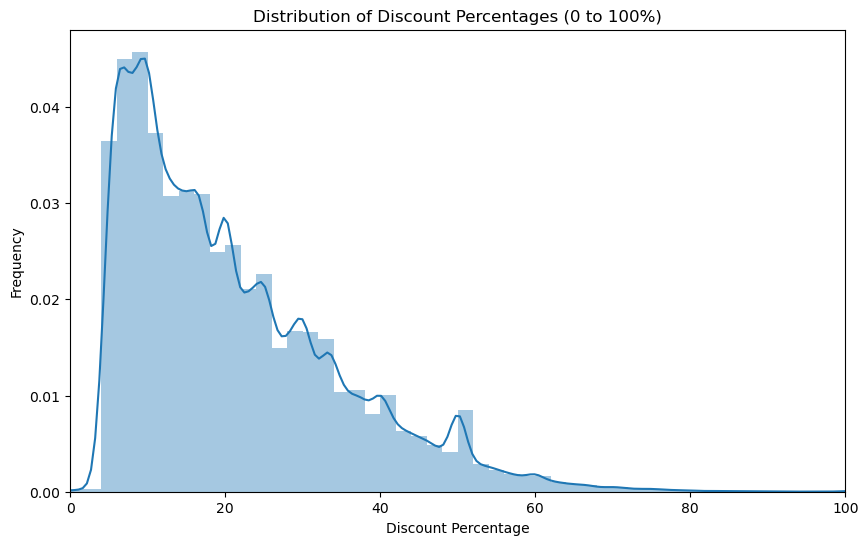

In [9]:
# Filter out zero values and values over 100%
discount_percent_filtered = data['discount_percent'][(data['discount_percent'] > 0) & (data['discount_percent'] <= 100)]

# Distribution of non-zero and <=100% discount percentages
plt.figure(figsize=(10,6))
sns.distplot(discount_percent_filtered.dropna())
plt.title('Distribution of Discount Percentages (0 to 100%)')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Set x-axis limit from 0 to 100
plt.show()


In [10]:
data

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,discount,discount_percent
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,139.99,104,False,2000,0.00,0.000000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,40.00,19.048526
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,64.50,15.000349
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,62.78,17.715947
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,135.00,43.549792
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Me...,https://m.media-amazon.com/images/I/71PDJFz6AA...,https://www.amazon.com/dp/B00R3LIKCO,4.2,0,14.95,14.95,112,False,0,0.00,0.000000
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Br...,https://m.media-amazon.com/images/I/812Tycexs4...,https://www.amazon.com/dp/B098BQ7ZQ3,4.4,0,33.99,33.99,112,False,0,0.00,0.000000
1426334,B07X1MVNT1,[4 Pack] Adjustable Eyeglasses and Sunglasses ...,https://m.media-amazon.com/images/I/61vvYW1S9J...,https://www.amazon.com/dp/B07X1MVNT1,3.6,0,8.54,8.54,112,False,0,0.00,0.000000
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,https://m.media-amazon.com/images/I/51+yjD4F1x...,https://www.amazon.com/dp/B08XLBG8V9,4.5,0,54.36,57.39,112,False,0,3.03,5.279665


## Model Building
We will build a logistic regression model to predict the bestseller status of a product based on discount percentage and other relevant features.


In [18]:
# Convert isBestSeller to numeric
data['isBestSeller'] = data['isBestSeller'].astype(int)

In [19]:
# Transform 'title' using TF-IDF
tfidf = TfidfVectorizer(max_features=100)  # You can adjust the number of features
title_features = tfidf.fit_transform(data['title']).toarray()
title_features_df = pd.DataFrame(title_features, columns=tfidf.get_feature_names())

# Combine title features with original data
data_combined = pd.concat([data, title_features_df], axis=1)


,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,discount,discount_percent
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,139.99,104,0,2000,0.00,0.000000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,0,1000,40.00,19.048526
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,0,300,64.50,15.000349
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,0,400,62.78,17.715947
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,0,400,135.00,43.549792
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Me...,https://m.media-amazon.com/images/I/71PDJFz6AA...,https://www.amazon.com/dp/B00R3LIKCO,4.2,0,14.95,14.95,112,0,0,0.00,0.000000
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Br...,https://m.media-amazon.com/images/I/812Tycexs4...,https://www.amazon.com/dp/B098BQ7ZQ3,4.4,0,33.99,33.99,112,0,0,0.00,0.000000
1426334,B07X1MVNT1,[4 Pack] Adjustable Eyeglasses and Sunglasses ...,https://m.media-amazon.com/images/I/61vvYW1S9J...,https://www.amazon.com/dp/B07X1MVNT1,3.6,0,8.54,8.54,112,0,0,0.00,0.000000
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,https://m.media-amazon.com/images/I/51+yjD4F1x...,https://www.amazon.com/dp/B08XLBG8V9,4.5,0,54.36,57.39,112,0,0,3.03,5.279665


In [22]:
# Transform 'title' using TF-IDF
tfidf = TfidfVectorizer(max_features=100)  # You can adjust the number of features
title_features = tfidf.fit_transform(data['title']).toarray()
title_features_df = pd.DataFrame(title_features, columns=tfidf.get_feature_names())

C:\Users\amish\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
title_features_df

,10,100,12,15,16,accessories,adjustable,air,and,art,...,travel,up,usb,wall,watch,water,waterproof,white,with,women
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.322967,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.417338
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.546771,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.303661,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426332,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1426333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.762357,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1426334,0.0,0.0,0.0,0.0,0.0,0.0,0.414080,0.0,0.240508,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.212674,0.000000
1426335,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [28]:
# Combine title features with original data
data_combined = pd.concat([data, title_features_df], axis=1)

In [29]:
data_combined

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,...,travel,up,usb,wall,watch,water,waterproof,white,with,women
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,139.99,104,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.417338
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.546771,0.000000
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.303661,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Me...,https://m.media-amazon.com/images/I/71PDJFz6AA...,https://www.amazon.com/dp/B00R3LIKCO,4.2,0,14.95,14.95,112,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Br...,https://m.media-amazon.com/images/I/812Tycexs4...,https://www.amazon.com/dp/B098BQ7ZQ3,4.4,0,33.99,33.99,112,0,...,0.0,0.762357,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1426334,B07X1MVNT1,[4 Pack] Adjustable Eyeglasses and Sunglasses ...,https://m.media-amazon.com/images/I/61vvYW1S9J...,https://www.amazon.com/dp/B07X1MVNT1,3.6,0,8.54,8.54,112,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.212674,0.000000
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,https://m.media-amazon.com/images/I/51+yjD4F1x...,https://www.amazon.com/dp/B08XLBG8V9,4.5,0,54.36,57.39,112,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [30]:
# Selecting features for the model
X = data_combined.drop(['boughtInLastMonth', 'asin', 'title', 'imgUrl', 'productURL', 'discount'], axis=1)
y = data_combined['boughtInLastMonth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [31]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 686371.538771454
R-squared: 0.07690760330068247


In [ ]:
## Continuation for next time 
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split

# Load and preprocess your data
# ...

# Scaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Scaling the target variable if necessary
# y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
model.evaluate(X_test, y_test)

'''